In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))


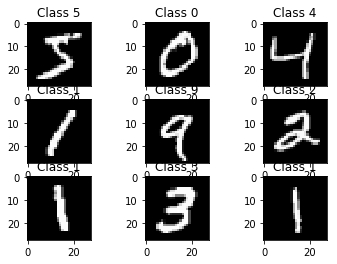

In [3]:
%matplotlib inline

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
# SELU based activation. very similar useage as RELU. 
# NOTE: New type of AlphaDropout for SELU

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('selu')) 
model.add(AlphaDropout(0.2))
model.add(Dense(512))
model.add(Activation('selu'))
model.add(AlphaDropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [8]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.4150     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2091     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1515     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.1222     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1021     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0889     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0771     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.0705     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0619     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.0585     


In [9]:
score = model.evaluate(X_test, Y_test)
score

 9664/10000 [===========================>..] - ETA: 0s

0.092325189258183393

In [10]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9760/10000 [============================>.] - ETA: 0s

In [11]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [12]:
incorrect_indices

array([ 104,  151,  158,  241,  247,  274,  321,  340,  347,  445,  447,
        448,  578,  582,  619,  659,  720,  846,  895,  944,  951,  956,
        965, 1014, 1039, 1044, 1112, 1156, 1182, 1194, 1224, 1226, 1232,
       1247, 1260, 1319, 1328, 1393, 1414, 1494, 1500, 1522, 1549, 1553,
       1609, 1681, 1709, 1717, 1754, 1790, 1878, 1901, 1955, 1984, 1987,
       2016, 2024, 2040, 2070, 2098, 2109, 2118, 2135, 2162, 2182, 2224,
       2237, 2272, 2293, 2329, 2387, 2414, 2422, 2426, 2488, 2582, 2597,
       2607, 2648, 2654, 2713, 2720, 2743, 2810, 2863, 2896, 2915, 2921,
       2927, 2939, 2953, 3030, 3073, 3115, 3117, 3225, 3405, 3422, 3503,
       3520, 3534, 3549, 3558, 3567, 3597, 3751, 3776, 3780, 3808, 3838,
       3893, 3906, 3941, 3976, 4007, 4065, 4075, 4078, 4193, 4207, 4224,
       4248, 4259, 4271, 4289, 4294, 4306, 4355, 4360, 4425, 4437, 4443,
       4497, 4536, 4635, 4690, 4740, 4761, 4807, 4814, 4876, 4880, 4966,
       5078, 5140, 5199, 5331, 5642, 5734, 5835, 58

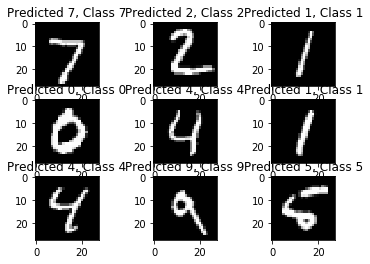

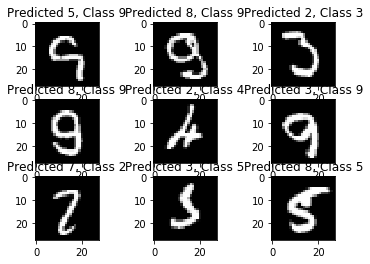

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))